<img src="imgs/dh_logo.png" align="right" width="50%">

# Aula 3.4 - Data Compression

Fala galera! Tudo bem? Finalmente passamos pela parte mais teórica de machine learning, então agora vamos começar com a prática! A ideia das próximas aulas é trazer exemplos gradativamente mais próximos da realidade de forma a naturalizar vocês em todo o processo de obtenção, manipulação e modelagem de dados, ao mesmo tempo que veremos os principais algoritmos de machine learning. Na aula de hoje, iremos nos deparar com 2 datasetsde vinho!. Para resolver esses 2 problemas, veremos que algoritmos de Data Compression, também chamados de Dimensionality Reductions, são úteis para achar fatores importantes num dataset. Bora pra aula!

In [1]:
# Imports
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from tqdm import tqdm


%matplotlib inline
tqdm.pandas(desc="Operation Progress")

## Dica de hoje: Machine Learning @ YouTube

Bom, já que vamos finalmente conhecer os algoritmos de Machine Learning, nada melhor do que passar para vocês algumas recomendações de canais sobre o temaÇ
 - __[Siraj Raval](https://www.youtube.com/channel/UCWN3xxRkmTPmbKwht9FuE5A)__: possivelmente o youtuber mais famoso das áreas de dados e machine learning, ele consegue passar conceitos complicados de algoritmos com belas explicações focando no entendimento intuitivo de seu funcionamento. Um ótimo ponto desse canal é que ele disponibiliza os notebooks das aulas em seu GitHub, então você pode aproveitar o código para estudar e consultar futuramente. Recomendo fortemente assistir a playlist "The Math of Intelligence" do Siraj e seus live Kaggle competitions.
 - __[Nubank on the Stage](https://www.youtube.com/channel/UC5yS6v2umoIXx8TSJsUEBKg)__: infelizmente os ingressos para os meetups do Nubank acabam em questões de minutos, e muitas vezes não conseguimos aproveitar seus eventos. Pensando nisso, o Nubank um canal no YouTube com as principais talks que já passaram por seu palco.
 - __[StatQuest](https://www.youtube.com/channel/UCtYLUTtgS3k1Fg4y5tAhLbw)__: como o próprio nome diz, esse canal é focado em estatística, e consegue passar conceitos da área com explicações passo a passo. Pra quem precisa de uma revisão em estatística, tá aí uma ótima pedida.
 - __[PyData](https://www.youtube.com/channel/UCOjD18EJYcsBog4IozkF_7w)__: sendo uma das principais conferências mundiais de dados e machine learning, o canal do PyData disponibiliza suas principais talks, que abrangem desde de conceitos teóricos ao uso de ferramentas de dados. Sâo vídeos mais extensos, mas é uma ótima forma de você se manter atualizado sobre o que o ecossistema mundial de dados com Python está fazendo
 - __[Two Minute Papers](https://www.youtube.com/channel/UCbfYPyITQ-7l4upoX8nvctg)__: focado principalmente em algoritmos gráficos, modelos gerativos e aprendizado por reforço, esse canal apresenta e resume alguns dos principais papers lançados.
 
 
## Wine Class Dataset

Pra começar, iremos explorar um __[dataset](https://www.kaggle.com/brynja/wineuci)__ com características de vinhos e sua respectiva classe. O objetivo dessa primeira parte é entender quais características fazem de um vinho uma bebida de qualidade. Vamos importar o dataset e já chamar o método `.info()`:

In [26]:
# Lendo o dataset e chamando o método .info() para termos uma noção dele
wine = pd.read_csv(
    'data/Wine.csv',
    names=['class','alcohol','malic_acid','ash','ash_alcalinity','magnesium','total_phenols','flavanoids','nonflavanoids_phenols',
           'proanthocyanins','color_intensity','hue','dilution','proline'])
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
class                    178 non-null int64
alcohol                  178 non-null float64
malic_acid               178 non-null float64
ash                      178 non-null float64
ash_alcalinity           178 non-null float64
magnesium                178 non-null int64
total_phenols            178 non-null float64
flavanoids               178 non-null float64
nonflavanoids_phenols    178 non-null float64
proanthocyanins          178 non-null float64
color_intensity          178 non-null float64
hue                      178 non-null float64
dilution                 178 non-null float64
proline                  178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


In [27]:
wine['class'].value_counts()

2    71
1    59
3    48
Name: class, dtype: int64

Para um melhor entendimento do dataset, vamos chamar seu método `.head()`

In [28]:
wine.head(10)

,class,alcohol,malic_acid,ash,ash_alcalinity,magnesium,total_phenols,flavanoids,nonflavanoids_phenols,proanthocyanins,color_intensity,hue,dilution,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


Precisamos entender, então, quais features têm impacto sobre *class*. Vamos realizar 2 plots já conhecidos, `pairplot` e `heatmap`:

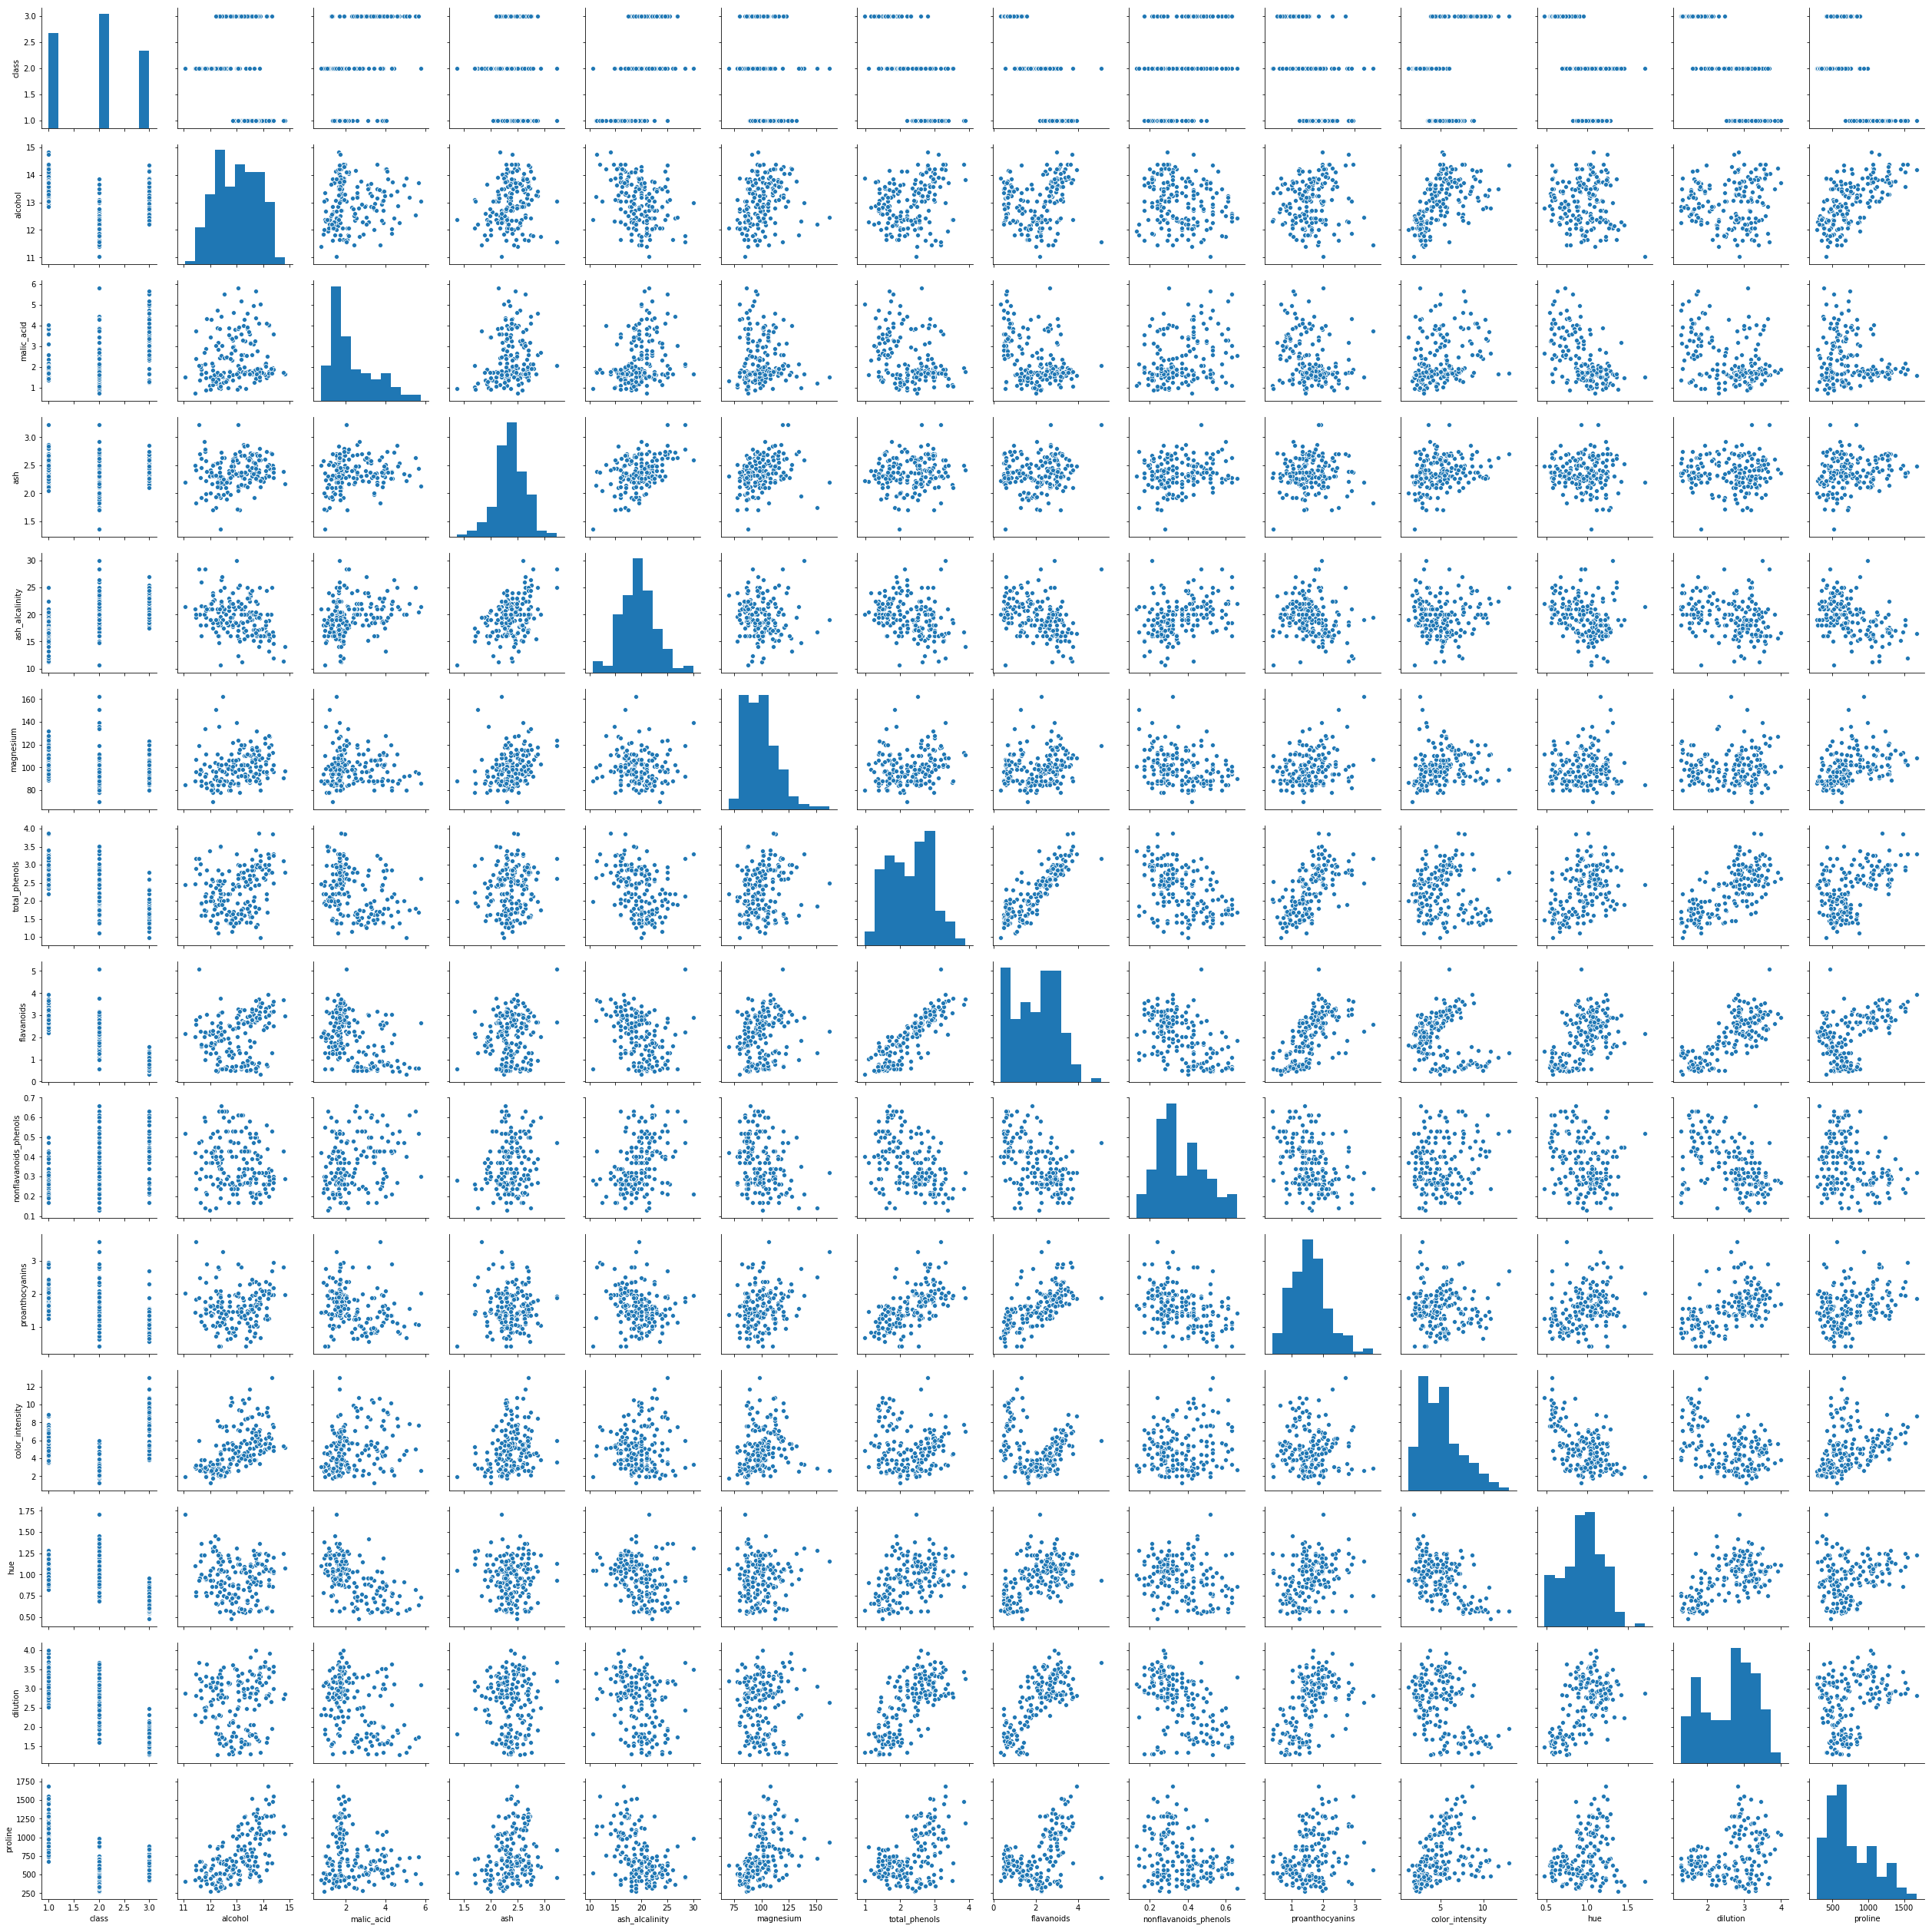

In [29]:
sns.pairplot(wine)

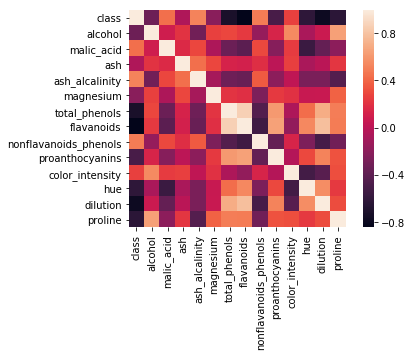

In [30]:
corrmat = wine.corr()
sns.heatmap(corrmat, square=True)

Ok, aqui nos deparamos com um problema: diferente do Iris Dataset, que possui 4 features e plots simples, estamos lidando com um espaço 13-dimensional, com plots mais confusos de analisar. Se formos fazer um feature engineering de modo artesanal e visual como estávamos acostumados, podemos nos perder muito facilmente. Deve haver alguma forma de entender quais features são de fato úteis, ou seja, **carregam a maior quantidade de informação sobre nosso dataset** sem depender se inspeção visual desses plots. Enter Data Compression! <br>
Podemos pensar no nosso dataset como um tensor, um conjunto de features no qual cada uma delas carrega uma quantidade de informação sobre a distribuição de dados nele. Em casos bi ou tri dimensionais, conseguimos facilmente representar esse dataset em plots e tomar decisões em cima deles. Porém, de 4-dimensional em diante, isso não é mais possível. Os algoritmos de compressão agem justamente para que possamos projetar nossos dados em dimensṍes menores perdendo o mínimo de informação possível. O primeiro algoritmo que veremos é o PCA (Principal Component Analysis)! <br>
Caso você esteja consultando esse material ou perdeu essa aula, veja __[esse vídeo](https://www.youtube.com/watch?v=FgakZw6K1QQ&t=3s)__ ao invés da explicação ao vivo. A ideia do PCA é descobrir quais features carregam mais informação ao entender em quais desses features há uma maior variância (no caso, esse conceito estará relacionado aos seus autovalores). Ao descobrir quais features são esses, o PCA **projeta** seus dados seguindo os eixos de transformação. Vamos implementá-lo:

In [31]:
wine.columns

Index(['class', 'alcohol', 'malic_acid', 'ash', 'ash_alcalinity', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoids_phenols',
       'proanthocyanins', 'color_intensity', 'hue', 'dilution', 'proline'],
      dtype='object')

In [32]:
wine.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
class,178.0,1.94,0.78,1.00,1.00,2.00,3.00,3.00
alcohol,178.0,13.00,0.81,11.03,12.36,13.05,13.68,14.83
malic_acid,178.0,2.34,1.12,0.74,1.60,1.87,3.08,5.80
ash,178.0,2.37,0.27,1.36,2.21,2.36,2.56,3.23
ash_alcalinity,178.0,19.49,3.34,10.60,17.20,19.50,21.50,30.00
magnesium,178.0,99.74,14.28,70.00,88.00,98.00,107.00,162.00
total_phenols,178.0,2.30,0.63,0.98,1.74,2.36,2.80,3.88
flavanoids,178.0,2.03,1.00,0.34,1.20,2.13,2.88,5.08
nonflavanoids_phenols,178.0,0.36,0.12,0.13,0.27,0.34,0.44,0.66
proanthocyanins,178.0,1.59,0.57,0.41,1.25,1.56,1.95,3.58


In [33]:
wine2 = wine-wine.mean()
wine2.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
class,178.0,-0.0,0.78,-0.94,-0.94,0.06,1.06,1.06
alcohol,178.0,0.0,0.81,-1.97,-0.64,0.05,0.68,1.83
malic_acid,178.0,0.0,1.12,-1.60,-0.73,-0.47,0.75,3.46
ash,178.0,-0.0,0.27,-1.01,-0.16,-0.01,0.19,0.86
ash_alcalinity,178.0,0.0,3.34,-8.89,-2.29,0.01,2.01,10.51
magnesium,178.0,-0.0,14.28,-29.74,-11.74,-1.74,7.26,62.26
total_phenols,178.0,-0.0,0.63,-1.32,-0.55,0.06,0.50,1.58
flavanoids,178.0,0.0,1.00,-1.69,-0.82,0.11,0.85,3.05
nonflavanoids_phenols,178.0,-0.0,0.12,-0.23,-0.09,-0.02,0.08,0.30
proanthocyanins,178.0,-0.0,0.57,-1.18,-0.34,-0.04,0.36,1.99


In [34]:
X = wine.drop(['class'], axis=1)

X = (X - X.mean())/X.std()

X.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
alcohol,178.0,0.0,1.0,-2.43,-0.79,0.06,0.83,2.25
malic_acid,178.0,0.0,1.0,-1.43,-0.66,-0.42,0.67,3.10
ash,178.0,-0.0,1.0,-3.67,-0.57,-0.02,0.70,3.15
ash_alcalinity,178.0,-0.0,1.0,-2.66,-0.69,0.00,0.60,3.15
magnesium,178.0,-0.0,1.0,-2.08,-0.82,-0.12,0.51,4.36
total_phenols,178.0,0.0,1.0,-2.10,-0.88,0.10,0.81,2.53
flavanoids,178.0,0.0,1.0,-1.69,-0.83,0.11,0.85,3.05
nonflavanoids_phenols,178.0,-0.0,1.0,-1.86,-0.74,-0.18,0.61,2.40
proanthocyanins,178.0,-0.0,1.0,-2.06,-0.60,-0.06,0.63,3.48
color_intensity,178.0,-0.0,1.0,-1.63,-0.79,-0.16,0.49,3.43


In [35]:
# distributing the dataset into two components X and Y 
X = X.values
y = wine['class'].values 

Abaixo, aplique o `train_test_split` em X e y com split de 80-20 e random_state=42. Caso não se lembre de como fazê-lo, leia sua documentação __[aqui](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)__.

In [38]:
# %load solutions/solution_00.py
# Splitting the X and Y into the 
# Training set and Testing set 
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) 

Abaixo, aplique o `Standard Scaler` em *X_train* e *X_test*. Isso é necessário pois, como o PCA calcula distâncias, precisamos nos certificar que todos os features estão na mesma escala para evitar enviesamento. Caso não lembre de como fazê-lo, leia sua documentação __[aqui](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)__.

In [47]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# # %load solutions/solution_01.py
# # performing preprocessing part 
# from sklearn.preprocessing import StandardScaler 
# sc = StandardScaler() 
  
# X_train = sc.fit_transform(X_train) 
# X_test = sc.transform(X_test) 

Agora que temos nossos dados na mesma escala, vamos aplicar o PCA. Ele está localizado no módulo de *decomposition* do scikit-learn. Como sempre, vamos importar o modelo, instanciá-lo com os hiperparâmetros desejados, realizar o fitting-transform e analisar sua transformação. Nesse caso, chamamos de fit-transform e transform ao invés de fit e prediction pois estamos transoformando (no caso, projetando) nossos dados. Na célula abaixo, aplique um PCA com 2 componentes sobre X_train e transforme o X_test:

In [48]:
# Aplicando o PCA

from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train) # Ajustando e transformando os dados
X_test = pca.transform(X_test) # transformando os dados com o modelo já ajustado

In [50]:
pd.DataFrame(X_train).corr()

,0,1
0,1.000000e+00,-2.537784e-16
1,-2.537784e-16,1.000000e+00


In [54]:
print(pca.components_)

[[-0.12066745  0.26133943  0.02788356  0.2496346  -0.14687697 -0.38510351
  -0.4148827   0.30655131 -0.30951491  0.12396866 -0.30522527 -0.38583351
  -0.25469502]
 [-0.49422695 -0.19247019 -0.32757004  0.03349307 -0.27589848 -0.11126263
  -0.0290841  -0.07092196 -0.08862596 -0.52922417  0.28130703  0.13120288
  -0.36278817]]


In [55]:
print(pca.explained_variance_)

[4.80561448 2.45759126]


Agora que temos X_train e X_teste transformados, podemos aplicar um modelo categorizador para separar nossas classes. Abaixo, aplique uma regressão logística com random_state = 42. Sua documentação está __[aqui](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)__

In [60]:
from sklearn.linear_model import LogisticRegression

In [62]:
modelo_instanciado = LogisticRegression()

In [64]:
# %load solutions/solution_03.py

# Fitting Logistic Regression To the training set 
from sklearn.linear_model import LogisticRegression   
  
classifier = LogisticRegression(random_state = 42)

classifier.fit(X_train, y_train) 

C:\Users\marcos.silva\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\marcos.silva\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [65]:
# Predicting the test set result using  
# predict function under LogisticRegression  
y_pred = classifier.predict(X_test) 

In [67]:
y_test

array([1, 1, 3, 1, 2, 1, 2, 3, 2, 3, 1, 3, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2,
       2, 3, 3, 3, 2, 2, 2, 1, 1, 2, 3, 1, 1, 1], dtype=int64)

In [66]:
y_pred

array([1, 1, 3, 1, 2, 1, 2, 3, 2, 3, 1, 3, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2,
       2, 3, 3, 3, 2, 2, 2, 1, 1, 2, 3, 1, 1, 1], dtype=int64)

In [68]:
for par in list(zip(list(y_test), list(y_pred))):
    
    if par[1] != par[0]:
        print("Errrouuu!")

In [69]:
# making confusion matrix between 
#  test set of Y and predicted value. 
from sklearn.metrics import confusion_matrix 
  
cm = confusion_matrix(y_test, y_pred) 

In [70]:
cm

array([[14,  0,  0],
       [ 0, 14,  0],
       [ 0,  0,  8]], dtype=int64)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


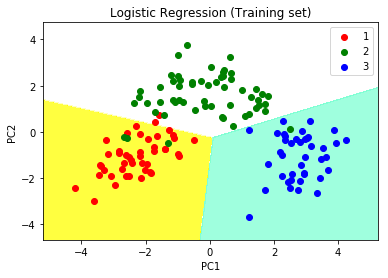

In [71]:
# Predicting the training set 
# result through scatter plot  
from matplotlib.colors import ListedColormap 
  
X_set, y_set = X_train, y_train 
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                     stop = X_set[:, 0].max() + 1, step = 0.01), 
                     np.arange(start = X_set[:, 1].min() - 1, 
                     stop = X_set[:, 1].max() + 1, step = 0.01)) 
  
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), 
             X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, 
             cmap = ListedColormap(('yellow', 'white', 'aquamarine'))) 
  
plt.xlim(X1.min(), X1.max()) 
plt.ylim(X2.min(), X2.max()) 
  
for i, j in enumerate(np.unique(y_set)): 
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], 
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j) 
  
plt.title('Logistic Regression (Training set)') 
plt.xlabel('PC1') # for Xlabel 
plt.ylabel('PC2') # for Ylabel 
plt.legend() # to show legend 
  
# show scatter plot 
plt.show() 

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


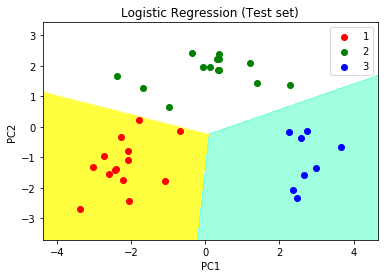

In [72]:
# Visualising the Test set results through scatter plot 
from matplotlib.colors import ListedColormap 
  
X_set, y_set = X_test, y_test 
  
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                     stop = X_set[:, 0].max() + 1, step = 0.01), 
                     np.arange(start = X_set[:, 1].min() - 1, 
                     stop = X_set[:, 1].max() + 1, step = 0.01)) 
  
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), 
             X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, 
             cmap = ListedColormap(('yellow', 'white', 'aquamarine')))  
  
plt.xlim(X1.min(), X1.max()) 
plt.ylim(X2.min(), X2.max()) 
  
for i, j in enumerate(np.unique(y_set)): 
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], 
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j) 
  
# title for scatter plot 
plt.title('Logistic Regression (Test set)')  
plt.xlabel('PC1') # for Xlabel 
plt.ylabel('PC2') # for Ylabel 
plt.legend() 
  
# show scatter plot 
plt.show() 

Nice! Ao comprimir nosso dataset com PCA, conseguimos entender quais as principais features para distinguir os 3 tipos de vinho :D!

## Wine Challenge

Agora que conseguimos fazer isso para um dataset com 3 classes, será possível entender quais componentes de um vinho afetam sua qualidade? Vamos utilizar outro dataset de vinhos para isso:

In [37]:
wine_a = pd.read_csv('data/wineanalysis.csv')
wine_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
Unnamed: 0              6497 non-null int64
fixed.acidity           6497 non-null float64
volatile.acidity        6497 non-null float64
citric.acid             6497 non-null float64
residual.sugar          6497 non-null float64
chlorides               6497 non-null float64
free.sulfur.dioxide     6497 non-null float64
total.sulfur.dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
type                    6497 non-null object
dtypes: float64(11), int64(2), object(1)
memory usage: 710.7+ KB


Algumas coisas a se notar:
 - Há uma coluna chamada Unnamed: 0. Ela está aí pois o dataset foi gravado com seus indexes, portanto é irrelevante para nós
 - Algumas colunas estão nomeadas com um '.' no nome. Isso não é interessante, pois pode confundir o Pandas
 - Temos 6497 observações em todas as linhas. Hooray!
Com base nos pontos acima, o que você faria com o dataset? Use a célula abaixo para realizar suas operações.

In [39]:
# %load solutions/solution_04.py

Legal, agora temos um dataset melhor. Vamos puxar o método `.head()`  para entende-lo melhor

In [40]:
wine_a.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


Abaixo, vamos analisar o spread de observações entre tipos de vinho. Faça um `.groupby()` por tipo e selecione alguma coluna para contar suas linhas:

In [43]:
# %load solutions/solution_05.py

KeyError: 'type'

Ok, parece que teremos que balancear o dataset antes de seguir em frente. Na célula abaixo, faça o balanceamento e aplicação do PCA, passo a passo:

## Como prever a qualidade do vinho?